# Pandas Demo
### Miki Tebeka, [353Solutions](http://353solutions.com)

## Few Points Before We Dive In

* Home at http://pandas.pydata.org
* Easiest way to install is via [Anaconda](https://store.continuum.io/cshop/anaconda/)
* Mostly used for *OSE* part of [*OSEMIC*](https://peadarcoyle.wordpress.com/2015/03/22/an-extension-of-the-data-science-process-osemic/)

## What You Get
* Reading from various sources (CSV, SQL, HDF5 ...)
* Labeled arrays (Series, DataFrame, Panel)
     * Fancy indexing
* Time series handling
* Grouping
* Merging (Join)
* Statistics
* Plotting
* Excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/)

## And There's a Great Book
![pfda](http://akamaicovers.oreilly.com/images/0636920023784/cat.gif)

Written by Wes McKinney, Pandas author.

## My Setup

In [289]:
%load_ext watermark
%watermark -e -v -m -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
05/07/2015 

CPython 2.7.10
IPython 3.2.0

numpy 1.9.2
pandas 0.16.2
matplotlib 1.4.3

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.0.7-2-ARCH
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('CME_CL1.csv')
print(len(df))
df.describe()

8092


,Open,High,Low,Last,Change,Settle,Volume,Open Interest
count,8090.000000,8091.000000,8091.000000,44.000000,347.000000,8092.000000,8092.000000,8091.000000
mean,41.728881,42.278597,41.141123,90.299545,1.024006,41.751771,108943.792140,123878.724756
std,29.819794,30.213587,29.380209,16.532061,0.895252,29.829748,116592.537312,105253.149922
min,10.000000,0.000000,0.000000,53.450000,0.010000,10.420000,0.000000,0.000000
25%,19.532500,19.720000,19.320000,82.012500,0.405000,19.520000,30257.750000,47395.000000
50%,27.950000,28.250000,27.700000,97.525000,0.770000,27.970000,57369.000000,87951.000000
75%,62.050000,62.800000,61.200000,102.550000,1.470000,62.012500,153916.500000,176242.000000
max,145.190000,147.270000,143.220000,107.300000,7.540000,145.290000,670082.000000,529039.000000


In [3]:
# quandl

In [4]:
df.columns

Index([u'Date', u'Open', u'High', u'Low', u'Last', u'Change', u'Settle',
       u'Volume', u'Open Interest'],
      dtype='object')

In [5]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Last             float64
Change           float64
Settle           float64
Volume           float64
Open Interest    float64
dtype: object

In [6]:
df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Open Interest
0,2015-07-02,56.87,57.95,56.50,NaN,0.03,56.93,297046,326973
1,2015-07-01,58.98,58.98,56.68,NaN,2.51,56.96,373405,319172
2,2015-06-30,58.27,59.69,57.94,59.4,1.14,59.47,282364,331764
3,2015-06-29,58.84,59.27,58.04,NaN,1.30,58.33,286035,332326
4,2015-06-26,59.66,59.96,58.76,NaN,0.07,59.63,231868,329016


In [8]:
df.index = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,,
2015-07-02,2015-07-02,56.87,57.95,56.50,NaN,0.03,56.93,297046,326973
2015-07-01,2015-07-01,58.98,58.98,56.68,NaN,2.51,56.96,373405,319172
2015-06-30,2015-06-30,58.27,59.69,57.94,59.4,1.14,59.47,282364,331764
2015-06-29,2015-06-29,58.84,59.27,58.04,NaN,1.30,58.33,286035,332326
2015-06-26,2015-06-26,59.66,59.96,58.76,NaN,0.07,59.63,231868,329016


In [9]:
df = pd.read_csv('CME_CL1.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2015-07-02,56.87,57.95,56.50,NaN,0.03,56.93,297046,326973
2015-07-01,58.98,58.98,56.68,NaN,2.51,56.96,373405,319172
2015-06-30,58.27,59.69,57.94,59.4,1.14,59.47,282364,331764
2015-06-29,58.84,59.27,58.04,NaN,1.30,58.33,286035,332326
2015-06-26,59.66,59.96,58.76,NaN,0.07,59.63,231868,329016


In [10]:
print(df['High'].mean())

42.2785972068


In [11]:
df['High'] > df['High'].mean()

Date
2015-07-02     True
2015-07-01     True
2015-06-30     True
2015-06-29     True
2015-06-26     True
2015-06-25     True
2015-06-24     True
2015-06-23     True
2015-06-22     True
2015-06-19     True
2015-06-18     True
2015-06-17     True
2015-06-16     True
2015-06-15     True
2015-06-12     True
2015-06-11     True
2015-06-10     True
2015-06-09     True
2015-06-08     True
2015-06-05     True
2015-06-04     True
2015-06-03     True
2015-06-02     True
2015-06-01     True
2015-05-29     True
2015-05-28     True
2015-05-27     True
2015-05-26     True
2015-05-22     True
2015-05-21     True
              ...  
1983-05-11    False
1983-05-10    False
1983-05-09    False
1983-05-06    False
1983-05-05    False
1983-05-04    False
1983-05-03    False
1983-05-02    False
1983-04-29    False
1983-04-28    False
1983-04-27    False
1983-04-26    False
1983-04-25    False
1983-04-22    False
1983-04-21    False
1983-04-20    False
1983-04-19    False
1983-04-18    False
1983-04-15    F

In [12]:
highs = df[df['High'] > df['High'].mean()]
print(len(highs))
highs.head()

2719


,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2015-07-02,56.87,57.95,56.50,NaN,0.03,56.93,297046,326973
2015-07-01,58.98,58.98,56.68,NaN,2.51,56.96,373405,319172
2015-06-30,58.27,59.69,57.94,59.4,1.14,59.47,282364,331764
2015-06-29,58.84,59.27,58.04,NaN,1.30,58.33,286035,332326
2015-06-26,59.66,59.96,58.76,NaN,0.07,59.63,231868,329016


In [13]:
from calendar import TUESDAY
df[df.index.dayofweek == TUESDAY].head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2015-06-30,58.27,59.69,57.94,59.4,1.14,59.47,282364,331764
2015-06-23,60.21,61.49,59.55,NaN,0.63,61.01,336224,332929
2015-06-16,59.60,60.37,59.42,NaN,0.45,59.97,233621,110232
2015-06-09,58.31,60.68,58.23,NaN,2.00,60.14,405385,271926
2015-06-02,60.18,61.58,60.09,NaN,1.06,61.26,344508,372076


In [14]:
from calendar import month
print(month(2015, 6))

     June 2015
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30



In [16]:
# .loc - by label
# .iloc - by offset
# .ix - tries to do the right thing
df.loc['2015-07']

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2015-07-02,56.87,57.95,56.50,NaN,0.03,56.93,297046,326973
2015-07-01,58.98,58.98,56.68,NaN,2.51,56.96,373405,319172


In [17]:
df.ix['2014', ['Open', 'Volume']].head()

,Open,Volume
Date,,
2014-12-31,53.87,247510
2014-12-30,53.72,230228
2014-12-29,55.05,253089
2014-12-26,55.86,138280
2014-12-24,56.80,174969


In [19]:
df['Diff'] = df['High'] - df['Low']
df['Diff'].head()

Date
2015-07-02    1.45
2015-07-01    2.30
2015-06-30    1.75
2015-06-29    1.23
2015-06-26    1.20
Name: Diff, dtype: float64

In [20]:
print(len(df[df['Diff'] == 0]))

16


In [22]:
def signal(diff):
    if diff < -1:
        return 'sell'
    elif diff > 1:
        return 'buy'
    else:
        return 'hold'
    
price = df['High']
shifted = price.shift()
diff = shifted - price
sig = diff.apply(signal)
df['Signal'] = sig.astype('category')
df['Signal'].head()

Date
2015-07-02    hold
2015-07-01    sell
2015-06-30    hold
2015-06-29    hold
2015-06-26    hold
Name: Signal, dtype: category
Categories (3, object): [buy, hold, sell]

In [23]:
import sqlite3
conn = sqlite3.connect('weather.db')  # NOAA
weather = pd.read_sql('SELECT * FROM weather', conn, index_col='DATE', parse_dates=['DATE'])
weather.head()

,index,AWND,SNOW,SNWD,STATION,STATION_NAME,TMAX,TMIN,TOBS,TSUN,...,WT08,WT09,WT10,WT11,WT14,WT15,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
1983-03-30,18677,-9999,0,NaN,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,78,0,-9999,246,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
1983-03-31,18678,-9999,0,NaN,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,78,28,-9999,42,...,1,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
1983-04-01,18679,-9999,0,NaN,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,94,28,-9999,114,...,1,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
1983-04-02,18680,-9999,0,NaN,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,44,22,-9999,0,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
1983-04-03,18681,-9999,0,NaN,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,44,28,-9999,0,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [24]:
wdf = df.join(weather)
print(wdf['High'].head())
print(df['High'].head())

Date
2015-07-02    57.95
2015-07-01    58.98
2015-06-30    59.69
2015-06-29    59.27
2015-06-26    59.96
Name: High, dtype: float64
Date
2015-07-02    57.95
2015-07-01    58.98
2015-06-30    59.69
2015-06-29    59.27
2015-06-26    59.96
Name: High, dtype: float64


In [26]:
wdf.query('SNOW < -100')['SNOW'].head()

Date
1998-04-30   -9999
1998-04-29   -9999
1998-04-28   -9999
1998-04-27   -9999
1998-04-24   -9999
Name: SNOW, dtype: float64

In [27]:
import numpy as np
wdf.ix[wdf['SNOW'] == -9999, 'SNOW'] = np.nan
wdf.query('SNOW < -100')['SNOW'].head()

Series([], Name: SNOW, dtype: float64)

In [28]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12, 8)
import matplotlib
matplotlib.style.use('ggplot')

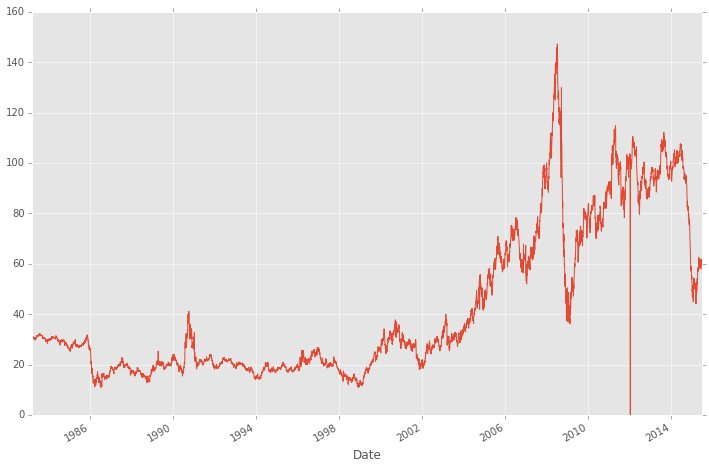

In [29]:
df['High'].plot()

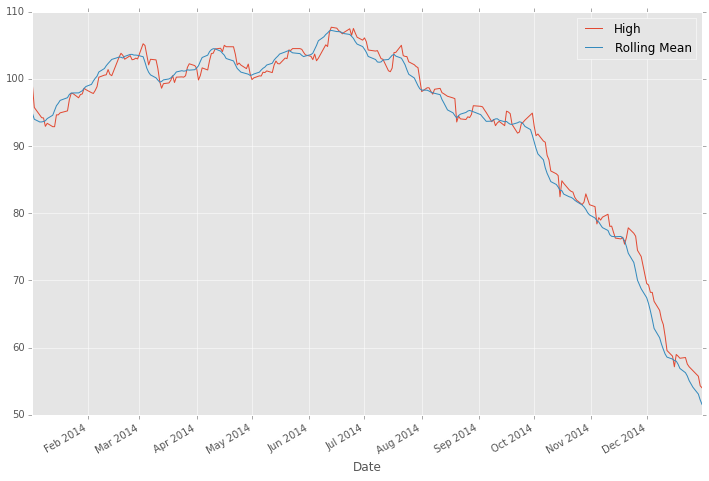

In [30]:
df['Rolling Mean'] = pd.rolling_mean(df['High'], window=7)
df.ix['2014', ['High', 'Rolling Mean']].plot();

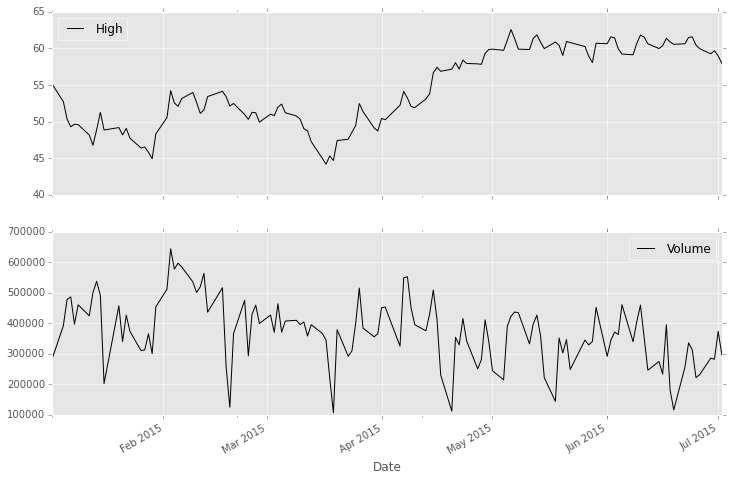

In [32]:
df.ix['2015', ['High', 'Volume']].plot(subplots=True);

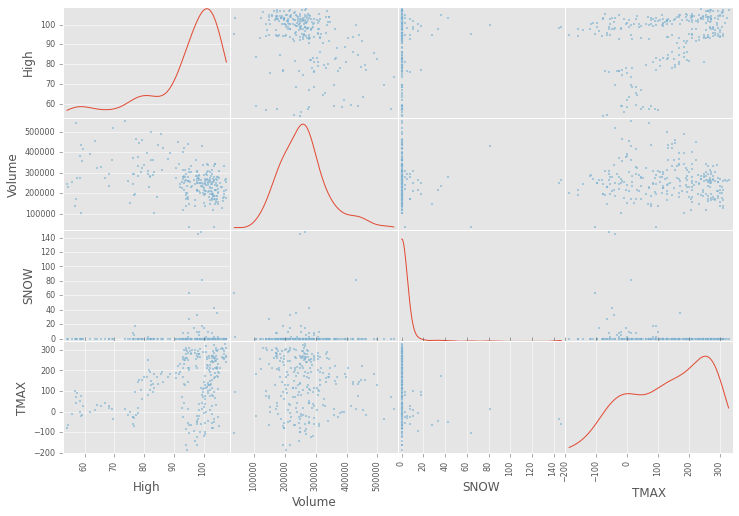

In [34]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(wdf.ix['2014', ['High', 'Volume', 'SNOW', 'TMAX']], diagonal='kde');

In [35]:
wdf.index

DatetimeIndex(['2015-07-02', '2015-07-01', '2015-06-30', '2015-06-29',
               '2015-06-26', '2015-06-25', '2015-06-24', '2015-06-23',
               '2015-06-22', '2015-06-19', 
               ...
               '1983-04-13', '1983-04-12', '1983-04-11', '1983-04-08',
               '1983-04-07', '1983-04-06', '1983-04-05', '1983-04-04',
               '1983-03-31', '1983-03-30'],
              dtype='datetime64[ns]', name=u'Date', length=8092, freq=None, tz=None)